# TASK1 (Titanic Survival Prediction)

# Import Libraries

In [18]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression

# Data Frame From csv File

In [20]:
tn_data = pd.read_csv("D:/internship_projects/Titanic-Dataset.csv")

In [22]:
tn_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
tn_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
tn_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [28]:
tn_data.shape

(891, 12)

In [30]:
tn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
tn_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
tn_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handle missing value

In [37]:
Age = tn_data['Age'].mean()

In [49]:
tn_data.fillna({'Age': Age}, inplace=True)

In [51]:
tn_data["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [55]:
tn_data.fillna({'Embarked': tn_data["Embarked"].mode()[0]}, inplace=True)


In [57]:
tn_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [59]:
tn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Visualization

In [62]:
sns.set()

<Axes: xlabel='Sex', ylabel='count'>

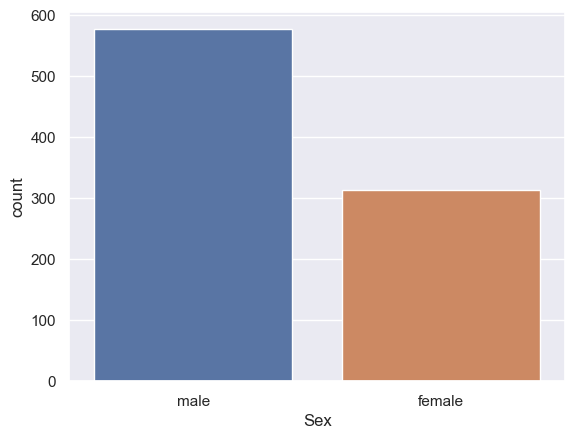

In [64]:
sns.countplot(x='Sex',hue = 'Sex', data=tn_data)

In [66]:
tn_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

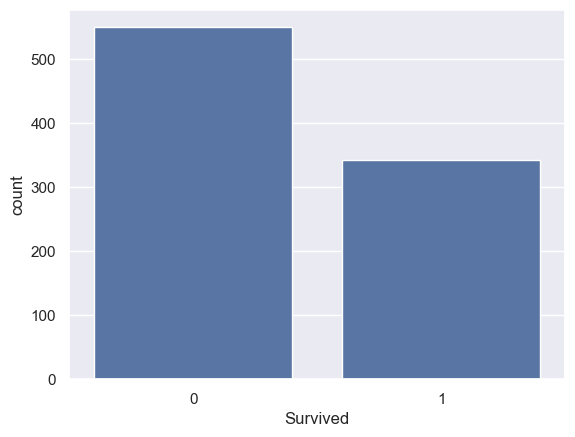

In [68]:
sns.countplot(x='Survived', data=tn_data)

<Axes: xlabel='Survived', ylabel='count'>

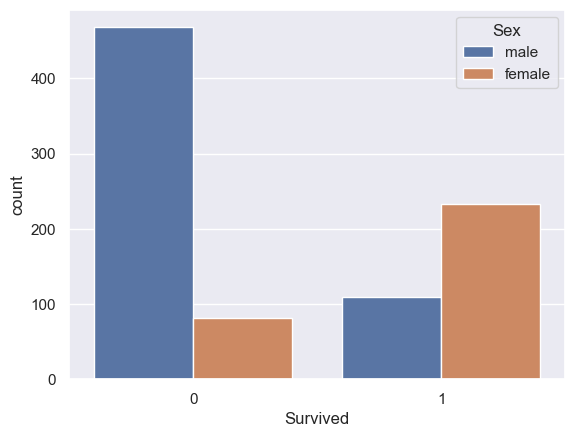

In [70]:
sns.countplot (x='Survived', hue = 'Sex', data = tn_data)

<Axes: xlabel='Parch', ylabel='count'>

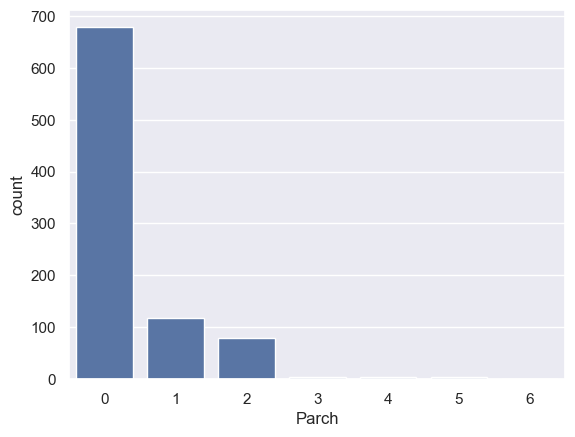

In [72]:
sns.countplot(x='Parch',data=tn_data)

In [74]:
print('Siblings:\n',tn_data['SibSp'].value_counts())
print('Parents : \n',tn_data['Parch'].value_counts())

Siblings:
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parents : 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [76]:
tn_data[['Survived', 'Sex']]

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
886,0,male
887,1,female
888,0,female
889,1,male


In [78]:
tn_data.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

In [80]:
 tn_data[['Survived', 'Pclass' ]]

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


In [82]:
tn_data.groupby('Survived')['Pclass'].value_counts()

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: count, dtype: int64

In [84]:
tn_data.groupby(['Survived','Pclass'])['Sex'].value_counts()

Survived  Pclass  Sex   
0         1       male       77
                  female      3
          2       male       91
                  female      6
          3       male      300
                  female     72
1         1       female     91
                  male       45
          2       female     70
                  male       17
          3       female     72
                  male       47
Name: count, dtype: int64

In [86]:
tn_data.groupby(['Survived','Embarked'])['Sex'].value_counts()

Survived  Embarked  Sex   
0         C         male       66
                    female      9
          Q         male       38
                    female      9
          S         male      364
                    female     63
1         C         female     64
                    male       29
          Q         female     27
                    male        3
          S         female    142
                    male       77
Name: count, dtype: int64

In [88]:
tn_data.groupby(['Survived','Embarked','Pclass'])['Sex'].value_counts()

Survived  Embarked  Pclass  Sex   
0         C         1       male       25
                            female      1
                    2       male        8
                    3       male       33
                            female      8
          Q         1       male        1
                    2       male        1
                    3       male       36
                            female      9
          S         1       male       51
                            female      2
                    2       male       82
                            female      6
                    3       male      231
                            female     55
1         C         1       female     42
                            male       17
                    2       female      7
                            male        2
                    3       female     15
                            male       10
          Q         1       female      1
                    2       female      2

# Converting the categorical variables into numerical data

In [101]:
tn_data.replace({'Sex':{'male':0, 'female':1},'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [103]:
tn_data

,Sex,Embarked
0,0,0
1,1,1
2,1,2
3,0,0


In [107]:
tn_data.describe()

,Sex,Embarked
count,4,4
unique,2,3
top,0,0
freq,2,2


In [109]:
tn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       4 non-null      object
 1   Embarked  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


In [119]:
import pandas as pd

# Sample DataFrame
tn_data = pd.DataFrame({
    'PassengerId': [1, 2, 3, 4],
    'Name': ['Name1', 'Name2', 'Name3', 'Name4'],
    'Ticket': ['A123', 'B456', 'C789', 'D012'],
    'Sex': ['male', 'female', 'female', 'male'],
    'Embarked': ['S', 'C', 'Q', 'S']
})

# Drop the specified columns
tn_data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

print(tn_data)


      Sex Embarked
0    male        S
1  female        C
2  female        Q
3    male        S


In [121]:
tn_data

,Sex,Embarked
0,male,S
1,female,C
2,female,Q
3,male,S


# Separating the target and features

In [126]:
import pandas as pd

# Sample DataFrame
tn_data = pd.DataFrame({
    'PassengerId': [1, 2, 3, 4],
    'Name': ['Name1', 'Name2', 'Name3', 'Name4'],
    'Ticket': ['A123', 'B456', 'C789', 'D012'],
    'Survived': [0, 1, 1, 0],
    'Sex': ['male', 'female', 'female', 'male'],
    'Embarked': ['S', 'C', 'Q', 'S']
})

# Check column names
print("Column names in tn_data:", tn_data.columns)

# Drop the 'Survived' column
if 'Survived' in tn_data.columns:
    X = tn_data.drop(columns=['Survived'])
    Y = tn_data['Survived']
    print("Columns in X:", X.columns)
    print("Y:", Y)
else:
    print("The column 'Survived' does not exist in the DataFrame.")


Column names in tn_data: Index(['PassengerId', 'Name', 'Ticket', 'Survived', 'Sex', 'Embarked'], dtype='object')
Columns in X: Index(['PassengerId', 'Name', 'Ticket', 'Sex', 'Embarked'], dtype='object')
Y: 0    0
1    1
2    1
3    0
Name: Survived, dtype: int64


In [128]:
print(X)
print(Y)

   PassengerId   Name Ticket     Sex Embarked
0            1  Name1   A123    male        S
1            2  Name2   B456  female        C
2            3  Name3   C789  female        Q
3            4  Name4   D012    male        S
0    0
1    1
2    1
3    0
Name: Survived, dtype: int64


# Splitting the data into training and testing

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [133]:
X_train.isnull().sum()

PassengerId    0
Name           0
Ticket         0
Sex            0
Embarked       0
dtype: int64

# Model training

In [136]:
model = LogisticRegression()

In [140]:
import pandas as pd

# Sample DataFrame (assuming the 'Survived' column has already been dropped from X)
tn_data = pd.DataFrame({
    'PassengerId': [1, 2, 3, 4],
    'Name': ['Name1', 'Name2', 'Name3', 'Name4'],
    'Ticket': ['A123', 'B456', 'C789', 'D012'],
    'Survived': [0, 1, 1, 0],
    'Sex': ['male', 'female', 'female', 'male'],
    'Embarked': ['S', 'C', 'Q', 'S']
})

# Check for non-numeric columns
print("Column data types:\n", tn_data.dtypes)


Column data types:
 PassengerId     int64
Name           object
Ticket         object
Survived        int64
Sex            object
Embarked       object
dtype: object


In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Drop non-numeric columns (if they are not needed)
tn_data = tn_data.drop(columns=['PassengerId', 'Name', 'Ticket'])

# Convert categorical columns to numeric using one-hot encoding
tn_data = pd.get_dummies(tn_data, columns=['Sex', 'Embarked'])

# Define features and target
X = tn_data.drop(columns=['Survived'])
Y = tn_data['Survived']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Output the coefficients
print("Model coefficients:", model.coef_)


Model coefficients: [[ 0.41711767 -0.4170558   0.          0.41711767 -0.4170558 ]]


# Model evalution

In [145]:
X_test_prediction = model.predict(X_test)

In [147]:
X_train_prediction = model.predict(X_train)

In [149]:
print(X_test_prediction)

[0]


In [151]:
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [153]:
print('Accuracy score of test data is : ',testing_data_accuracy)

Accuracy score of test data is :  0.0


In [157]:
from sklearn.metrics import precision_score

# Generate predictions
y_pred = model.predict(X_test)

# Check the unique values in the predictions
print("Unique values in predictions:", np.unique(y_pred))


Unique values in predictions: [0]


In [159]:
# Calculate precision with zero_division parameter to handle undefined metric
precision = precision_score(Y_test, y_pred, zero_division=0)
print("Precision:", precision)


Precision: 0.0


In [161]:
print('test data precion is :', test_data_precision)

test data precion is : 0.0


In [163]:
from sklearn import metrics

In [165]:
score = model.score(X_test,Y_test)
print(score)


0.0


In [167]:
cm = metrics.confusion_matrix(Y_train, X_train_prediction)
print(cm)

[[2 0]
 [0 1]]


Text(0.5, 1.0, "('Accuracy Score :', 0.0)")

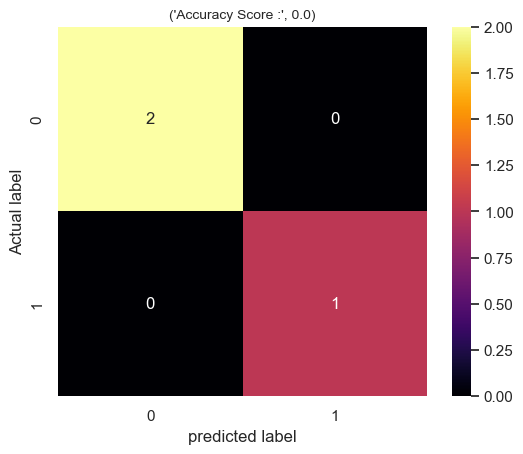

In [169]:
sns.heatmap(cm, annot = True, fmt = "d", square = True, cmap= "inferno")
plt.ylabel('Actual label')
plt.xlabel('predicted label')
title = ('Accuracy Score :',score)
plt.title(title, size = 10)

In [171]:
print(X) 
print(Y)

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S
0       False      True       False       False        True
1        True     False        True       False       False
2        True     False       False        True       False
3       False      True       False       False        True
0    0
1    1
2    1
3    0
Name: Survived, dtype: int64


In [173]:
X_test_prediction = model.predict(X_test)

# Calculating the survival rate
survival_rate = X_test_prediction.mean()

if survival_rate < 1:
    print("Congratulations! You survived.")
else:
    print("I'm sorry, but you have failed to survive.")

Congratulations! You survived.
